In [2]:
%matplotlib inline 
import pandas as pd 
import numpy as np
from math import sqrt
import pylab as pl
# Visualization Modules
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
# plot_tree(dt_reg) # For Large Datasets Tree Graph needs more visualization techniques

#Scipy Maths Models
import statsmodels.api as sm
from scipy import stats

# Machine Learning Training Modules
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor

# Clustering
from sklearn.cluster import KMeans



# Model Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Model Selection and Validation Methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, ShuffleSplit

# Preprocessing Modules 
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data_file = 'weight-height.csv' # make sure the path of the file is correct
df = pd.read_csv(data_file)
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


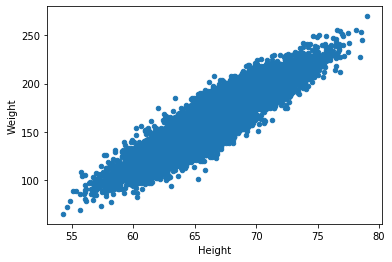

In [4]:
df.plot('Height', 'Weight', kind='scatter')

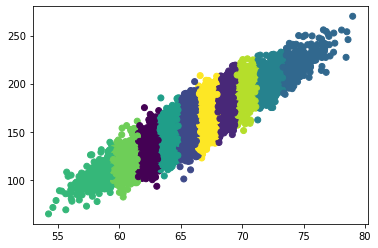

In [8]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(df.Height.values.reshape(-1,1), df.Weight.values.reshape(-1,1))
pl.scatter(x=df.Height.values, y=df.Weight.values, c=kmeans.labels_)

In [5]:
kmeans.predict([[30]])

array([2], dtype=int32)

In [6]:
kmeans.cluster_centers_

array([[66.44061033],
       [71.02797298],
       [61.9242387 ]])

# Elbow Method to find best K 

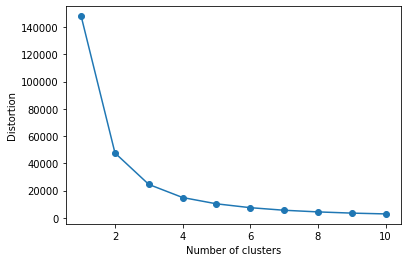

In [10]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(df.Height.values.reshape(-1,1), df.Weight.values.reshape(-1,1))
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()